# 📊 Análise e Visualização de Dados - Travel Features Rich

Este notebook contém análise exploratória e visualizações do dataset `travel_features_rich.csv`, que combina dados de viagens de bicicleta com informações climáticas.

## 1. Importar Bibliotecas e Carregar Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar tamanho padrão das figuras
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


In [2]:
# Carregar o dataset
df = pd.read_csv("data/processed/travel_features_rich.csv")

print(f"📁 Dataset carregado com {df.shape[0]:,} linhas e {df.shape[1]} colunas")
print(f"💾 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📁 Dataset carregado com 1,680,598 linhas e 23 colunas
💾 Tamanho em memória: 503.39 MB


## 2. Visão Geral dos Dados

In [3]:
# Primeiras linhas
print("\n🔍 Primeiras 5 linhas do dataset:")
df.head()


🔍 Primeiras 5 linhas do dataset:


,duration_min,hour,weekday,temp,feelslike,dew,humidity,precip,precipprob,preciptype,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon
0,2.550000,17,2,11.3,11.3,-4.5,32.74,0.0,0.0,NaN,...,11.1,264.0,1023.5,19.2,16.0,49.0,0.2,0.0,Clear,clear-day
1,13.734617,23,4,8.3,5.6,-2.1,47.62,0.0,0.0,NaN,...,17.4,272.0,1017.3,25.3,16.0,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night
2,11.842950,19,2,10.5,10.5,-4.2,35.46,0.0,0.0,NaN,...,8.9,291.0,1024.7,28.0,16.0,0.0,0.0,0.0,Partially cloudy,partly-cloudy-night
3,4.060483,12,3,2.5,-1.5,-12.9,30.97,0.0,0.0,NaN,...,16.6,233.0,1021.3,10.4,16.0,569.0,2.0,6.0,Clear,clear-day
4,23.020733,10,5,4.1,0.4,-8.7,38.64,0.0,0.0,NaN,...,17.3,318.0,1025.3,10.4,16.0,413.0,1.5,4.0,Clear,clear-day


In [4]:
# Informações gerais sobre o dataset
print("\n📋 Informações do Dataset:")
df.info()


📋 Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680598 entries, 0 to 1680597
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   duration_min      1680598 non-null  float64
 1   hour              1680598 non-null  int64  
 2   weekday           1680598 non-null  int64  
 3   temp              1680498 non-null  float64
 4   feelslike         1680498 non-null  float64
 5   dew               1680498 non-null  float64
 6   humidity          1680498 non-null  float64
 7   precip            1680498 non-null  float64
 8   precipprob        1680498 non-null  float64
 9   preciptype        89822 non-null    object 
 10  snow              1680498 non-null  float64
 11  snowdepth         1680498 non-null  float64
 12  windgust          1680498 non-null  float64
 13  windspeed         1680498 non-null  float64
 14  winddir           1680498 non-null  float64
 15  sealevelpressure  1680

In [5]:
# Estatísticas descritivas
print("\n📊 Estatísticas Descritivas (variáveis numéricas):")
df.describe().T


📊 Estatísticas Descritivas (variáveis numéricas):


,count,mean,std,min,25%,50%,75%,max
duration_min,1680598.0,10.854507,8.965818,1.000383,4.787017,8.111158,13.822092,59.9983
hour,1680598.0,13.813737,4.913439,0.000000,10.000000,14.000000,18.000000,23.0000
weekday,1680598.0,2.804307,1.948458,0.000000,1.000000,3.000000,4.000000,6.0000
temp,1680498.0,6.845402,5.599533,-15.400000,3.500000,6.300000,10.700000,20.2000
feelslike,1680498.0,4.879381,7.189339,-25.800000,0.300000,4.400000,10.700000,20.2000
dew,1680498.0,-3.754531,6.728465,-25.500000,-8.000000,-3.400000,1.000000,13.8000
humidity,1680498.0,50.007637,18.901047,15.560000,35.220000,44.770000,63.290000,94.4400
precip,1680498.0,0.027861,0.187149,0.000000,0.000000,0.000000,0.000000,2.5880
precipprob,1680498.0,5.151390,22.104353,0.000000,0.000000,0.000000,0.000000,100.0000
snow,1680498.0,0.003835,0.046246,0.000000,0.000000,0.000000,0.000000,1.0000


In [6]:
# Verificar valores ausentes
print("\n❓ Valores Ausentes:")
missing_data = pd.DataFrame({
    'Total': df.isnull().sum(),
    'Percentual (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total'] > 0].sort_values('Total', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
else:
    print("✅ Nenhum valor ausente encontrado!")


❓ Valores Ausentes:


,Total,Percentual (%)
preciptype,1590776,94.66
temp,100,0.01
dew,100,0.01
feelslike,100,0.01
humidity,100,0.01
precip,100,0.01
precipprob,100,0.01
snow,100,0.01
snowdepth,100,0.01
windgust,100,0.01


In [7]:
# Análise de variáveis categóricas
print("\n🏷️ Variáveis Categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts().head(10))


🏷️ Variáveis Categóricas:

preciptype: 3 valores únicos
preciptype
rain         66501
rain,snow    17874
snow          5447
Name: count, dtype: int64

conditions: 7 valores únicos
conditions
Partially cloudy          720559
Clear                     504235
Overcast                  369135
Rain, Overcast             57013
Snow, Rain, Overcast       14621
Rain, Partially cloudy      9488
Snow, Overcast              5447
Name: count, dtype: int64

icon: 7 valores únicos
icon
partly-cloudy-day      485681
cloudy                 369135
clear-day              354599
partly-cloudy-night    234878
clear-night            149636
rain                    65250
snow                    21319
Name: count, dtype: int64


## 3. Análise da Variável Alvo: Duração das Viagens

In [8]:
# Estatísticas da duração das viagens
print("\n⏱️ Estatísticas de Duração das Viagens (minutos):")
print(f"Média: {df['duration_min'].mean():.2f} min")
print(f"Mediana: {df['duration_min'].median():.2f} min")
print(f"Desvio Padrão: {df['duration_min'].std():.2f} min")
print(f"Mínimo: {df['duration_min'].min():.2f} min")
print(f"Máximo: {df['duration_min'].max():.2f} min")
print(f"\nQuartis:")
print(df['duration_min'].quantile([0.25, 0.5, 0.75]))


⏱️ Estatísticas de Duração das Viagens (minutos):
Média: 10.85 min
Mediana: 8.11 min
Desvio Padrão: 8.97 min
Mínimo: 1.00 min
Máximo: 60.00 min

Quartis:
0.25     4.787017
0.50     8.111158
0.75    13.822092
Name: duration_min, dtype: float64


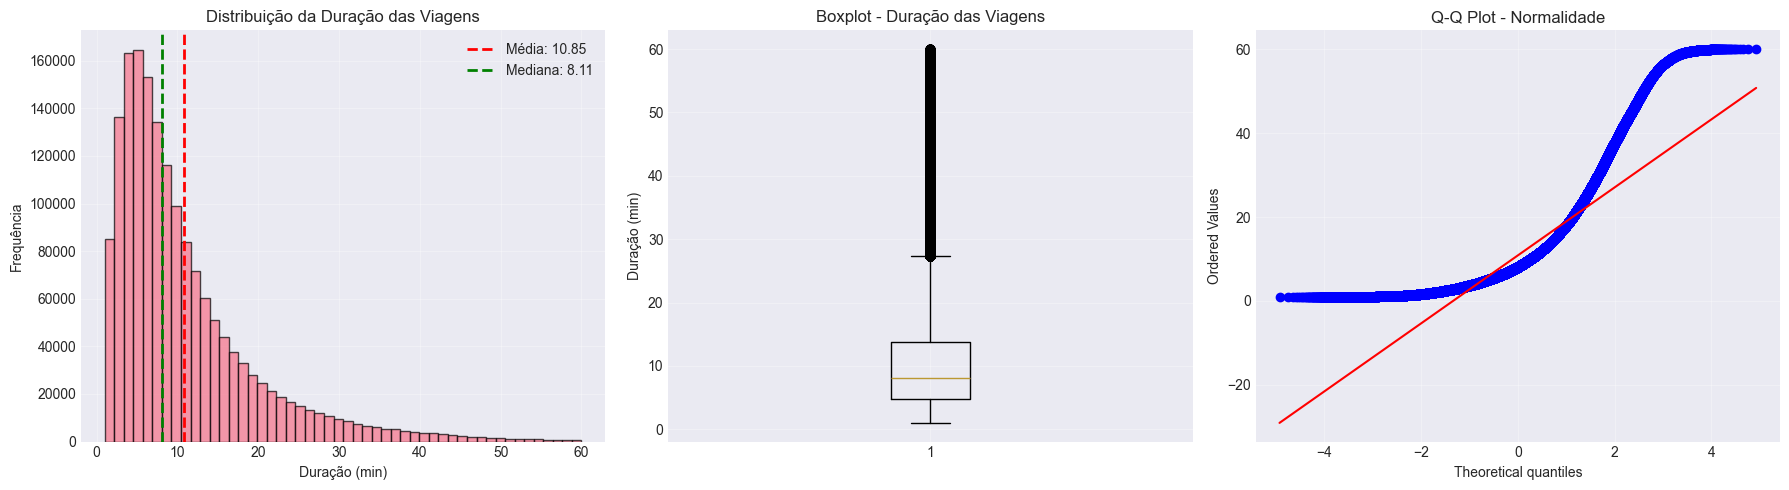

In [9]:
# Visualização da distribuição da duração
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(df['duration_min'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['duration_min'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["duration_min"].mean():.2f}')
axes[0].axvline(df['duration_min'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["duration_min"].median():.2f}')
axes[0].set_xlabel('Duração (min)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição da Duração das Viagens')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['duration_min'], vert=True)
axes[1].set_ylabel('Duração (min)')
axes[1].set_title('Boxplot - Duração das Viagens')
axes[1].grid(True, alpha=0.3)

# Q-Q Plot
stats.probplot(df['duration_min'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot - Normalidade')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Análise Temporal

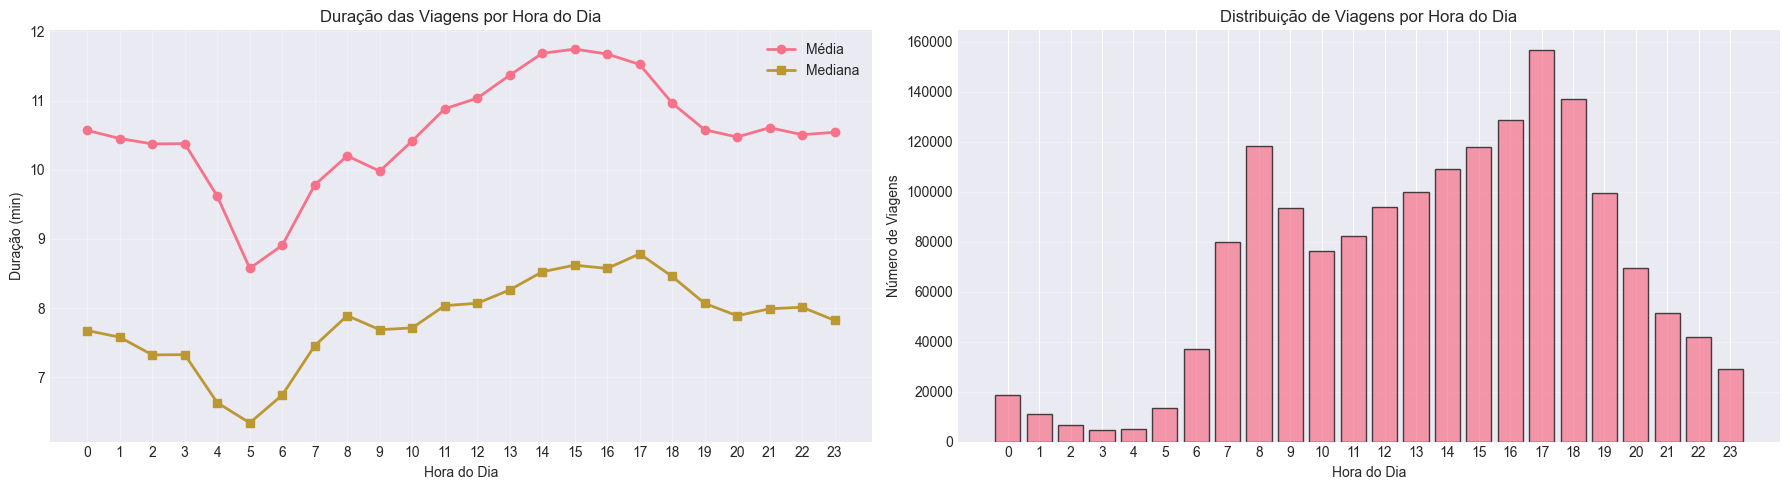

In [10]:
# Duração média por hora do dia
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Por hora
hourly_stats = df.groupby('hour')['duration_min'].agg(['mean', 'median', 'count'])
axes[0].plot(hourly_stats.index, hourly_stats['mean'], marker='o', linewidth=2, label='Média')
axes[0].plot(hourly_stats.index, hourly_stats['median'], marker='s', linewidth=2, label='Mediana')
axes[0].set_xlabel('Hora do Dia')
axes[0].set_ylabel('Duração (min)')
axes[0].set_title('Duração das Viagens por Hora do Dia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(0, 24))

# Número de viagens por hora
axes[1].bar(hourly_stats.index, hourly_stats['count'], alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Hora do Dia')
axes[1].set_ylabel('Número de Viagens')
axes[1].set_title('Distribuição de Viagens por Hora do Dia')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

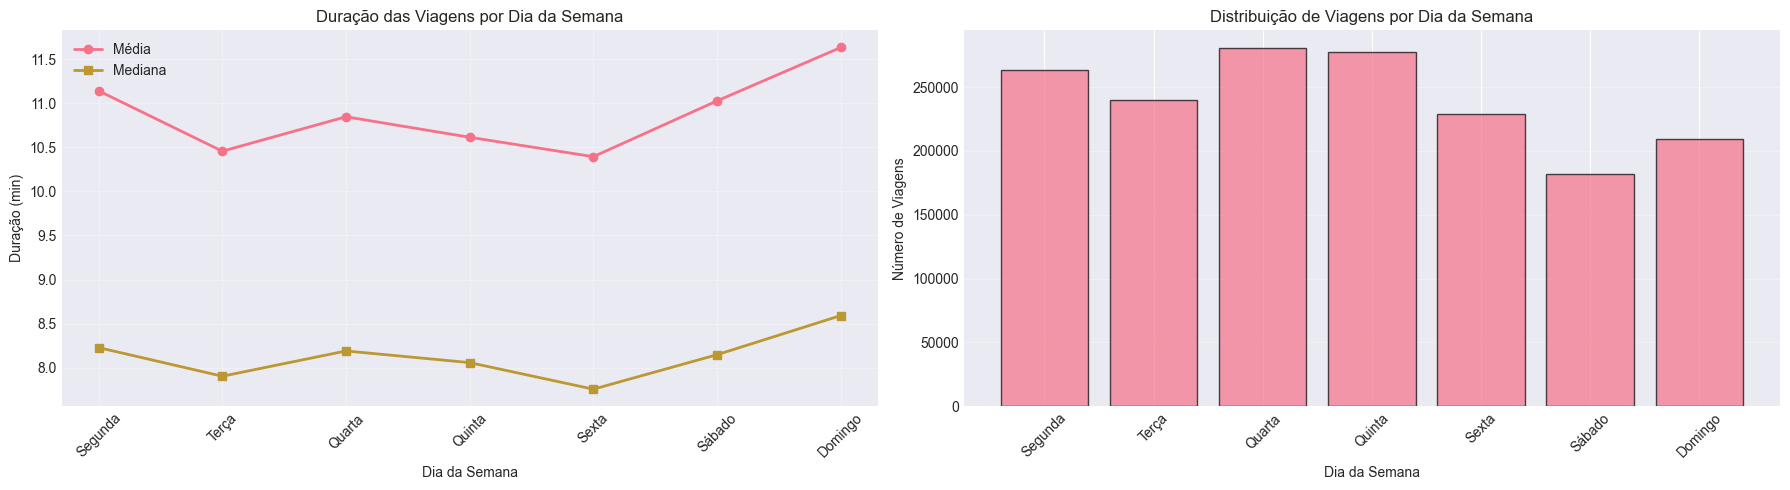

In [11]:
# Duração média por dia da semana
weekday_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
weekday_stats = df.groupby('weekday')['duration_min'].agg(['mean', 'median', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Duração por dia da semana
axes[0].plot(weekday_stats.index, weekday_stats['mean'], marker='o', linewidth=2, label='Média')
axes[0].plot(weekday_stats.index, weekday_stats['median'], marker='s', linewidth=2, label='Mediana')
axes[0].set_xlabel('Dia da Semana')
axes[0].set_ylabel('Duração (min)')
axes[0].set_title('Duração das Viagens por Dia da Semana')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(weekday_names, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Número de viagens por dia da semana
axes[1].bar(weekday_stats.index, weekday_stats['count'], alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Dia da Semana')
axes[1].set_ylabel('Número de Viagens')
axes[1].set_title('Distribuição de Viagens por Dia da Semana')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(weekday_names, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

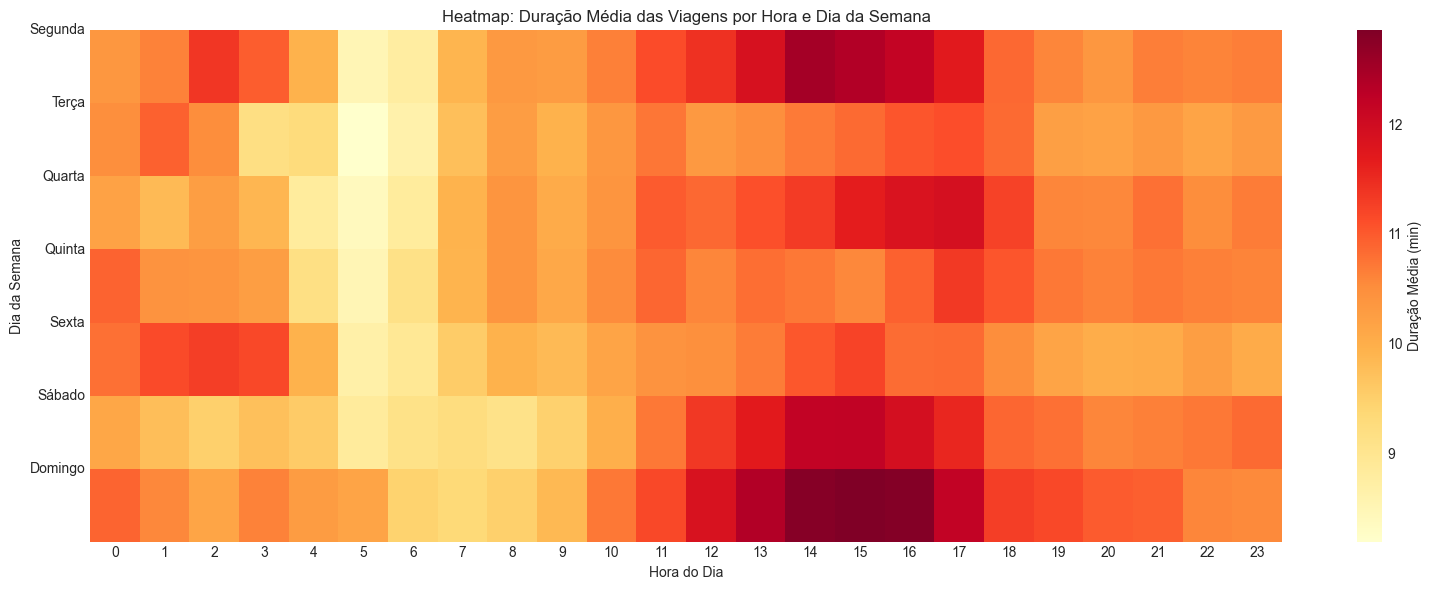

In [12]:
# Heatmap: Duração média por hora e dia da semana
pivot_duration = df.pivot_table(values='duration_min', index='weekday', columns='hour', aggfunc='mean')

plt.figure(figsize=(16, 6))
sns.heatmap(pivot_duration, annot=False, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Duração Média (min)'})
plt.ylabel('Dia da Semana')
plt.xlabel('Hora do Dia')
plt.title('Heatmap: Duração Média das Viagens por Hora e Dia da Semana')
plt.yticks(ticks=range(7), labels=weekday_names, rotation=0)
plt.tight_layout()
plt.show()

## 5. Análise das Variáveis Climáticas

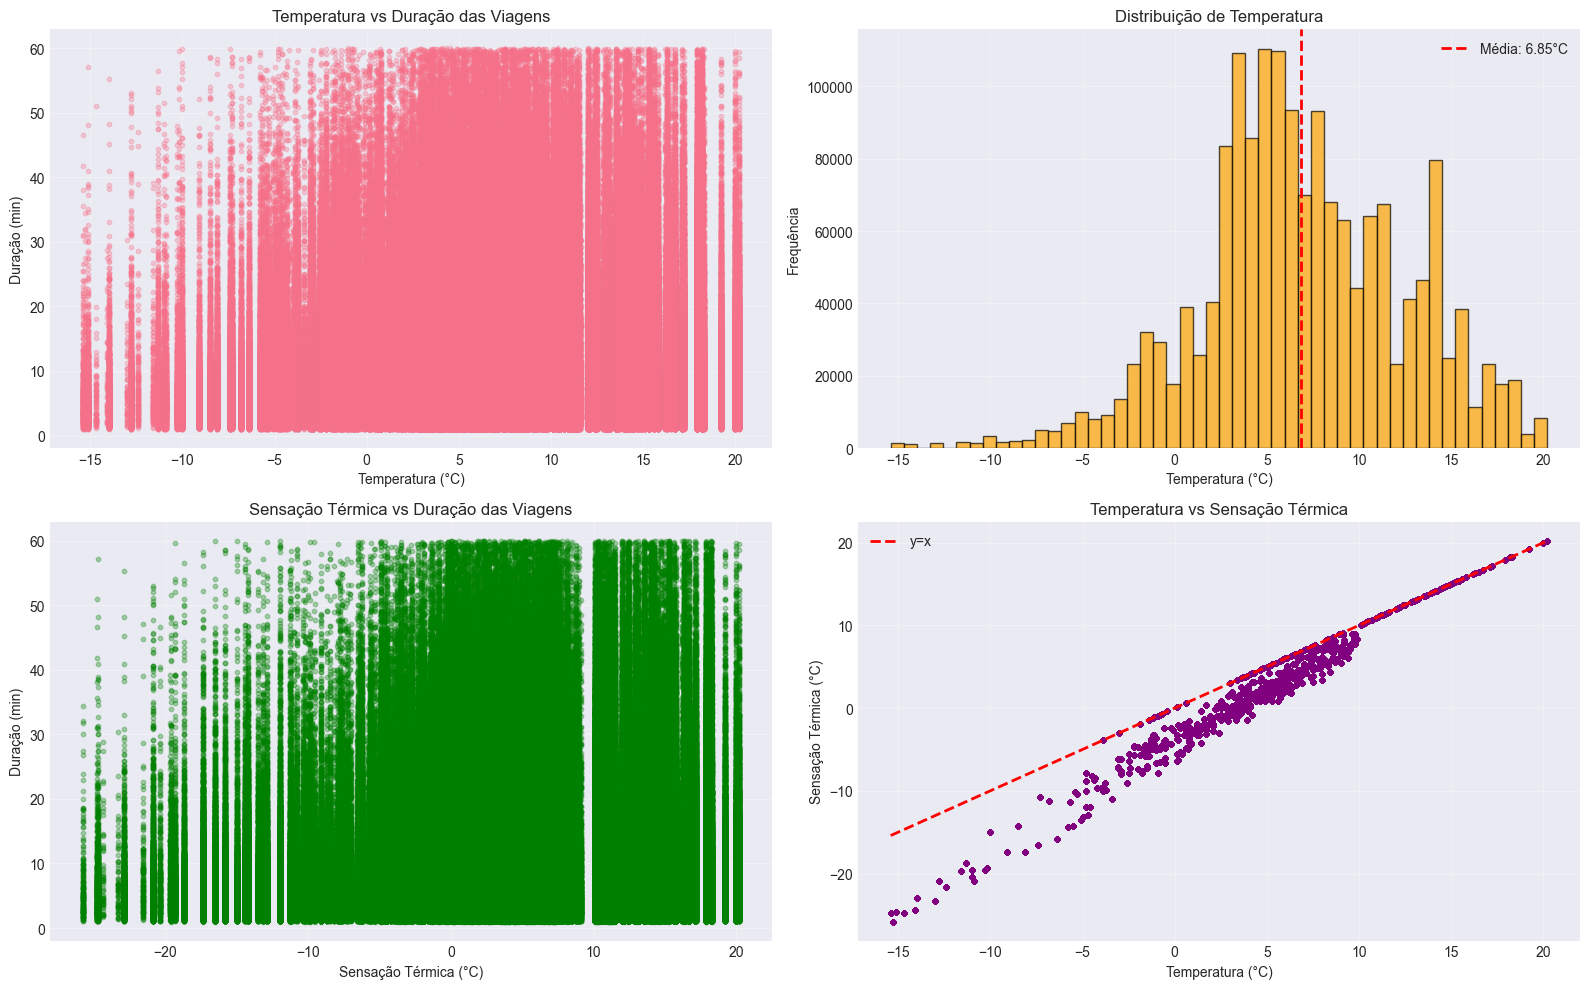

In [13]:
# Temperatura
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Temperatura vs Duração
axes[0, 0].scatter(df['temp'], df['duration_min'], alpha=0.3, s=10)
axes[0, 0].set_xlabel('Temperatura (°C)')
axes[0, 0].set_ylabel('Duração (min)')
axes[0, 0].set_title('Temperatura vs Duração das Viagens')
axes[0, 0].grid(True, alpha=0.3)

# Distribuição de temperatura
axes[0, 1].hist(df['temp'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].axvline(df['temp'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["temp"].mean():.2f}°C')
axes[0, 1].set_xlabel('Temperatura (°C)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição de Temperatura')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Sensação térmica vs Duração
axes[1, 0].scatter(df['feelslike'], df['duration_min'], alpha=0.3, s=10, color='green')
axes[1, 0].set_xlabel('Sensação Térmica (°C)')
axes[1, 0].set_ylabel('Duração (min)')
axes[1, 0].set_title('Sensação Térmica vs Duração das Viagens')
axes[1, 0].grid(True, alpha=0.3)

# Temperatura vs Sensação térmica
axes[1, 1].scatter(df['temp'], df['feelslike'], alpha=0.3, s=10, color='purple')
axes[1, 1].plot([df['temp'].min(), df['temp'].max()], [df['temp'].min(), df['temp'].max()], 'r--', linewidth=2, label='y=x')
axes[1, 1].set_xlabel('Temperatura (°C)')
axes[1, 1].set_ylabel('Sensação Térmica (°C)')
axes[1, 1].set_title('Temperatura vs Sensação Térmica')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

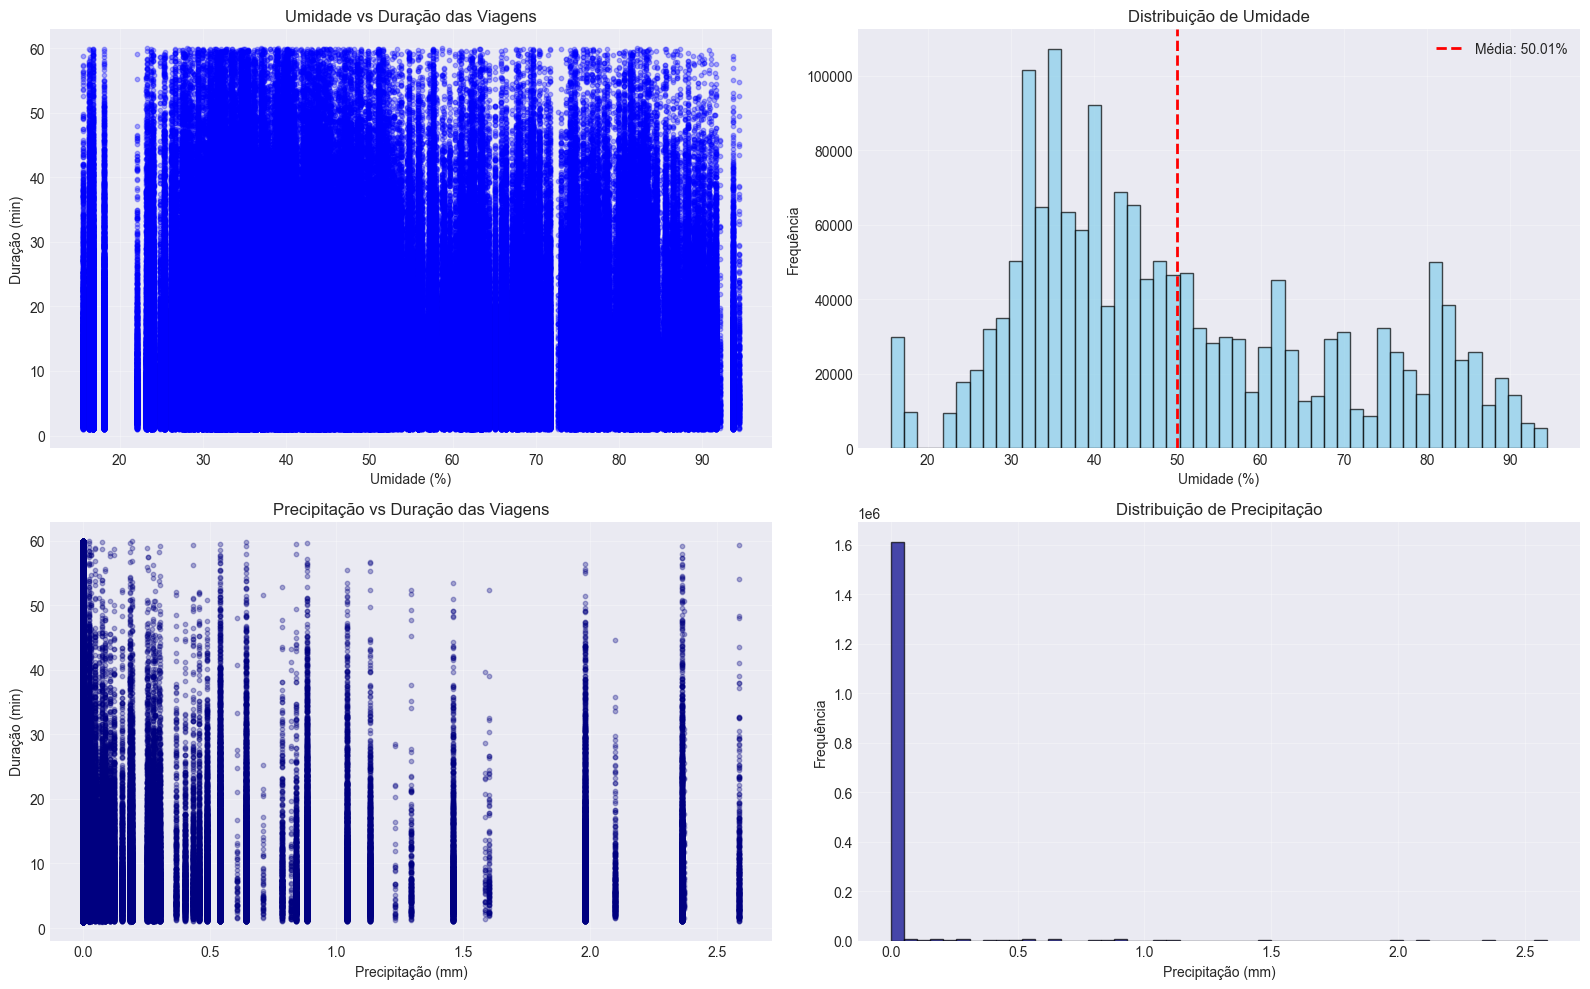

In [14]:
# Umidade e Precipitação
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Umidade vs Duração
axes[0, 0].scatter(df['humidity'], df['duration_min'], alpha=0.3, s=10, color='blue')
axes[0, 0].set_xlabel('Umidade (%)')
axes[0, 0].set_ylabel('Duração (min)')
axes[0, 0].set_title('Umidade vs Duração das Viagens')
axes[0, 0].grid(True, alpha=0.3)

# Distribuição de umidade
axes[0, 1].hist(df['humidity'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].axvline(df['humidity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["humidity"].mean():.2f}%')
axes[0, 1].set_xlabel('Umidade (%)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição de Umidade')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precipitação vs Duração
axes[1, 0].scatter(df['precip'], df['duration_min'], alpha=0.3, s=10, color='navy')
axes[1, 0].set_xlabel('Precipitação (mm)')
axes[1, 0].set_ylabel('Duração (min)')
axes[1, 0].set_title('Precipitação vs Duração das Viagens')
axes[1, 0].grid(True, alpha=0.3)

# Distribuição de precipitação
axes[1, 1].hist(df['precip'], bins=50, edgecolor='black', alpha=0.7, color='darkblue')
axes[1, 1].set_xlabel('Precipitação (mm)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição de Precipitação')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

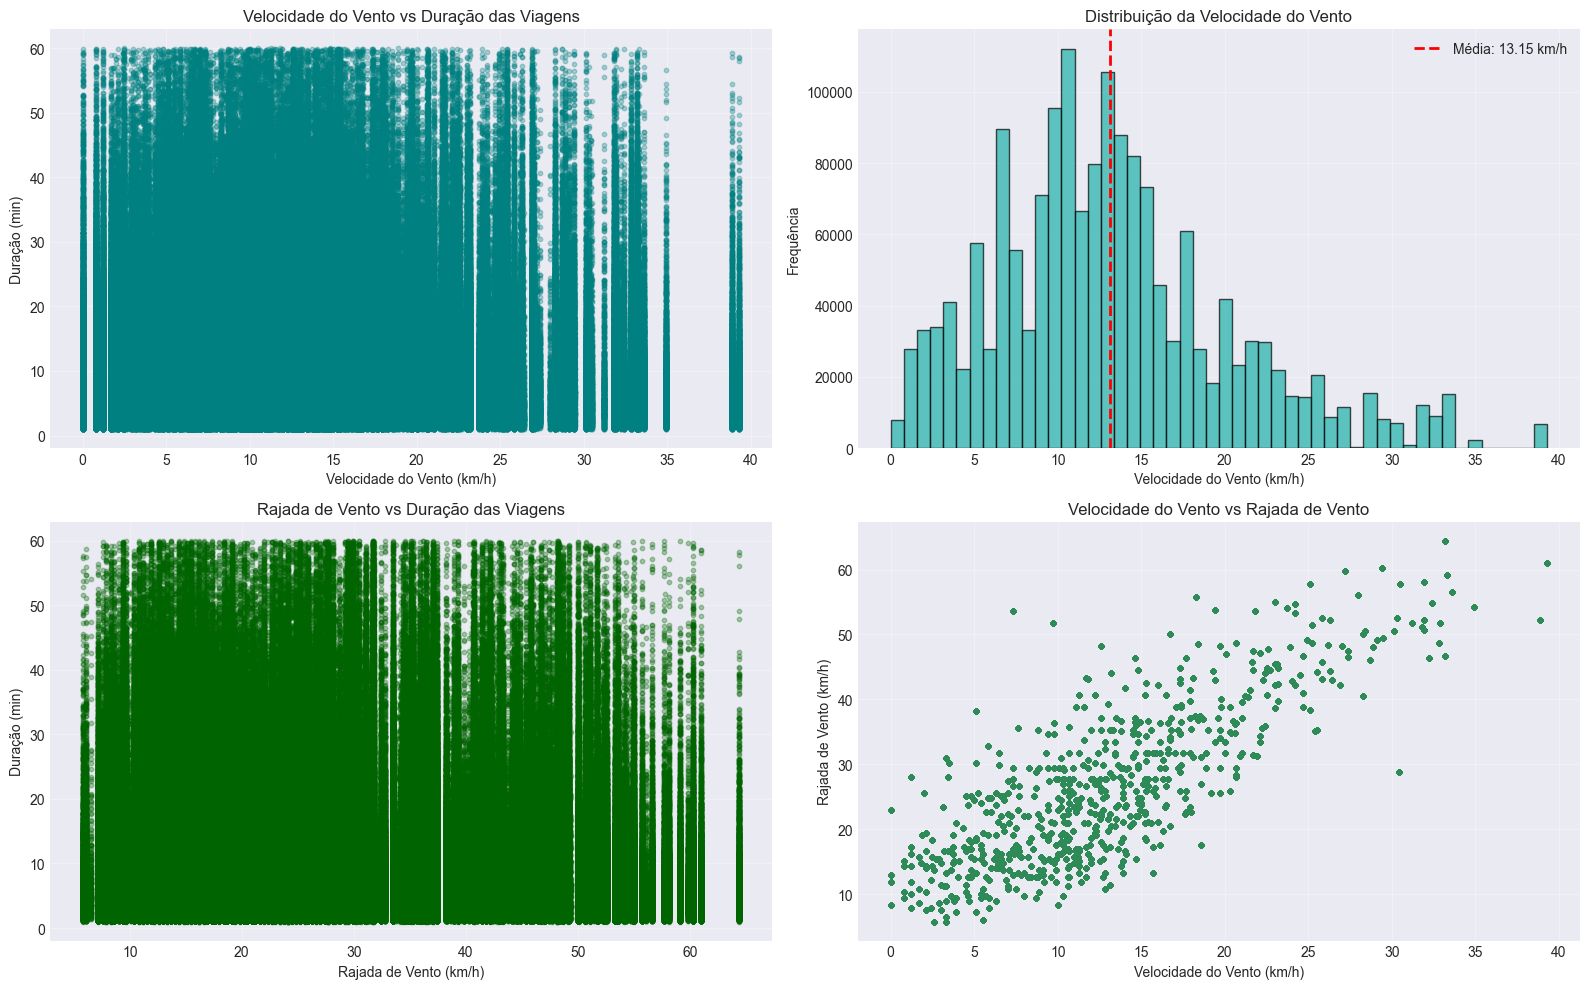

In [15]:
# Vento
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Velocidade do vento vs Duração
axes[0, 0].scatter(df['windspeed'], df['duration_min'], alpha=0.3, s=10, color='teal')
axes[0, 0].set_xlabel('Velocidade do Vento (km/h)')
axes[0, 0].set_ylabel('Duração (min)')
axes[0, 0].set_title('Velocidade do Vento vs Duração das Viagens')
axes[0, 0].grid(True, alpha=0.3)

# Distribuição de velocidade do vento
axes[0, 1].hist(df['windspeed'], bins=50, edgecolor='black', alpha=0.7, color='lightseagreen')
axes[0, 1].axvline(df['windspeed'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["windspeed"].mean():.2f} km/h')
axes[0, 1].set_xlabel('Velocidade do Vento (km/h)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].set_title('Distribuição da Velocidade do Vento')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Rajada de vento vs Duração
axes[1, 0].scatter(df['windgust'], df['duration_min'], alpha=0.3, s=10, color='darkgreen')
axes[1, 0].set_xlabel('Rajada de Vento (km/h)')
axes[1, 0].set_ylabel('Duração (min)')
axes[1, 0].set_title('Rajada de Vento vs Duração das Viagens')
axes[1, 0].grid(True, alpha=0.3)

# Windspeed vs Windgust
axes[1, 1].scatter(df['windspeed'], df['windgust'], alpha=0.3, s=10, color='seagreen')
axes[1, 1].set_xlabel('Velocidade do Vento (km/h)')
axes[1, 1].set_ylabel('Rajada de Vento (km/h)')
axes[1, 1].set_title('Velocidade do Vento vs Rajada de Vento')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

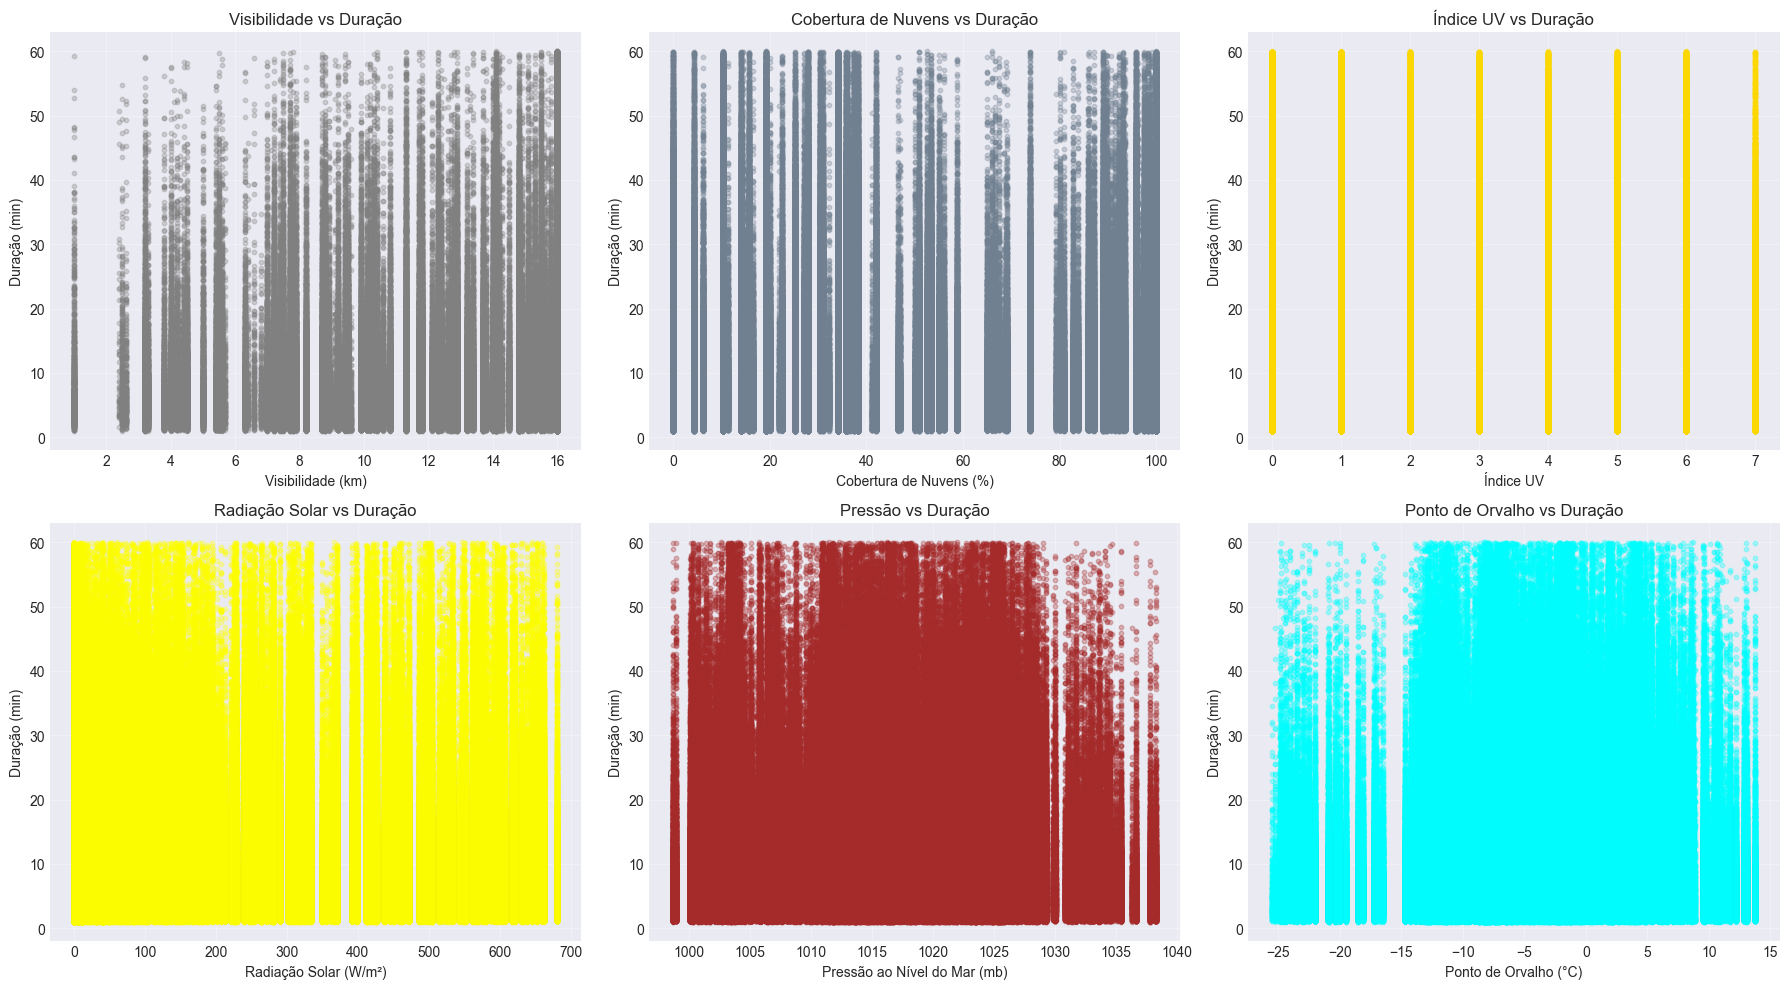

In [16]:
# Outras variáveis climáticas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Visibilidade
axes[0, 0].scatter(df['visibility'], df['duration_min'], alpha=0.3, s=10, color='gray')
axes[0, 0].set_xlabel('Visibilidade (km)')
axes[0, 0].set_ylabel('Duração (min)')
axes[0, 0].set_title('Visibilidade vs Duração')
axes[0, 0].grid(True, alpha=0.3)

# Cobertura de nuvens
axes[0, 1].scatter(df['cloudcover'], df['duration_min'], alpha=0.3, s=10, color='slategray')
axes[0, 1].set_xlabel('Cobertura de Nuvens (%)')
axes[0, 1].set_ylabel('Duração (min)')
axes[0, 1].set_title('Cobertura de Nuvens vs Duração')
axes[0, 1].grid(True, alpha=0.3)

# Índice UV
axes[0, 2].scatter(df['uvindex'], df['duration_min'], alpha=0.3, s=10, color='gold')
axes[0, 2].set_xlabel('Índice UV')
axes[0, 2].set_ylabel('Duração (min)')
axes[0, 2].set_title('Índice UV vs Duração')
axes[0, 2].grid(True, alpha=0.3)

# Radiação solar
axes[1, 0].scatter(df['solarradiation'], df['duration_min'], alpha=0.3, s=10, color='yellow')
axes[1, 0].set_xlabel('Radiação Solar (W/m²)')
axes[1, 0].set_ylabel('Duração (min)')
axes[1, 0].set_title('Radiação Solar vs Duração')
axes[1, 0].grid(True, alpha=0.3)

# Pressão ao nível do mar
axes[1, 1].scatter(df['sealevelpressure'], df['duration_min'], alpha=0.3, s=10, color='brown')
axes[1, 1].set_xlabel('Pressão ao Nível do Mar (mb)')
axes[1, 1].set_ylabel('Duração (min)')
axes[1, 1].set_title('Pressão vs Duração')
axes[1, 1].grid(True, alpha=0.3)

# Ponto de orvalho
axes[1, 2].scatter(df['dew'], df['duration_min'], alpha=0.3, s=10, color='cyan')
axes[1, 2].set_xlabel('Ponto de Orvalho (°C)')
axes[1, 2].set_ylabel('Duração (min)')
axes[1, 2].set_title('Ponto de Orvalho vs Duração')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Matriz de Correlação

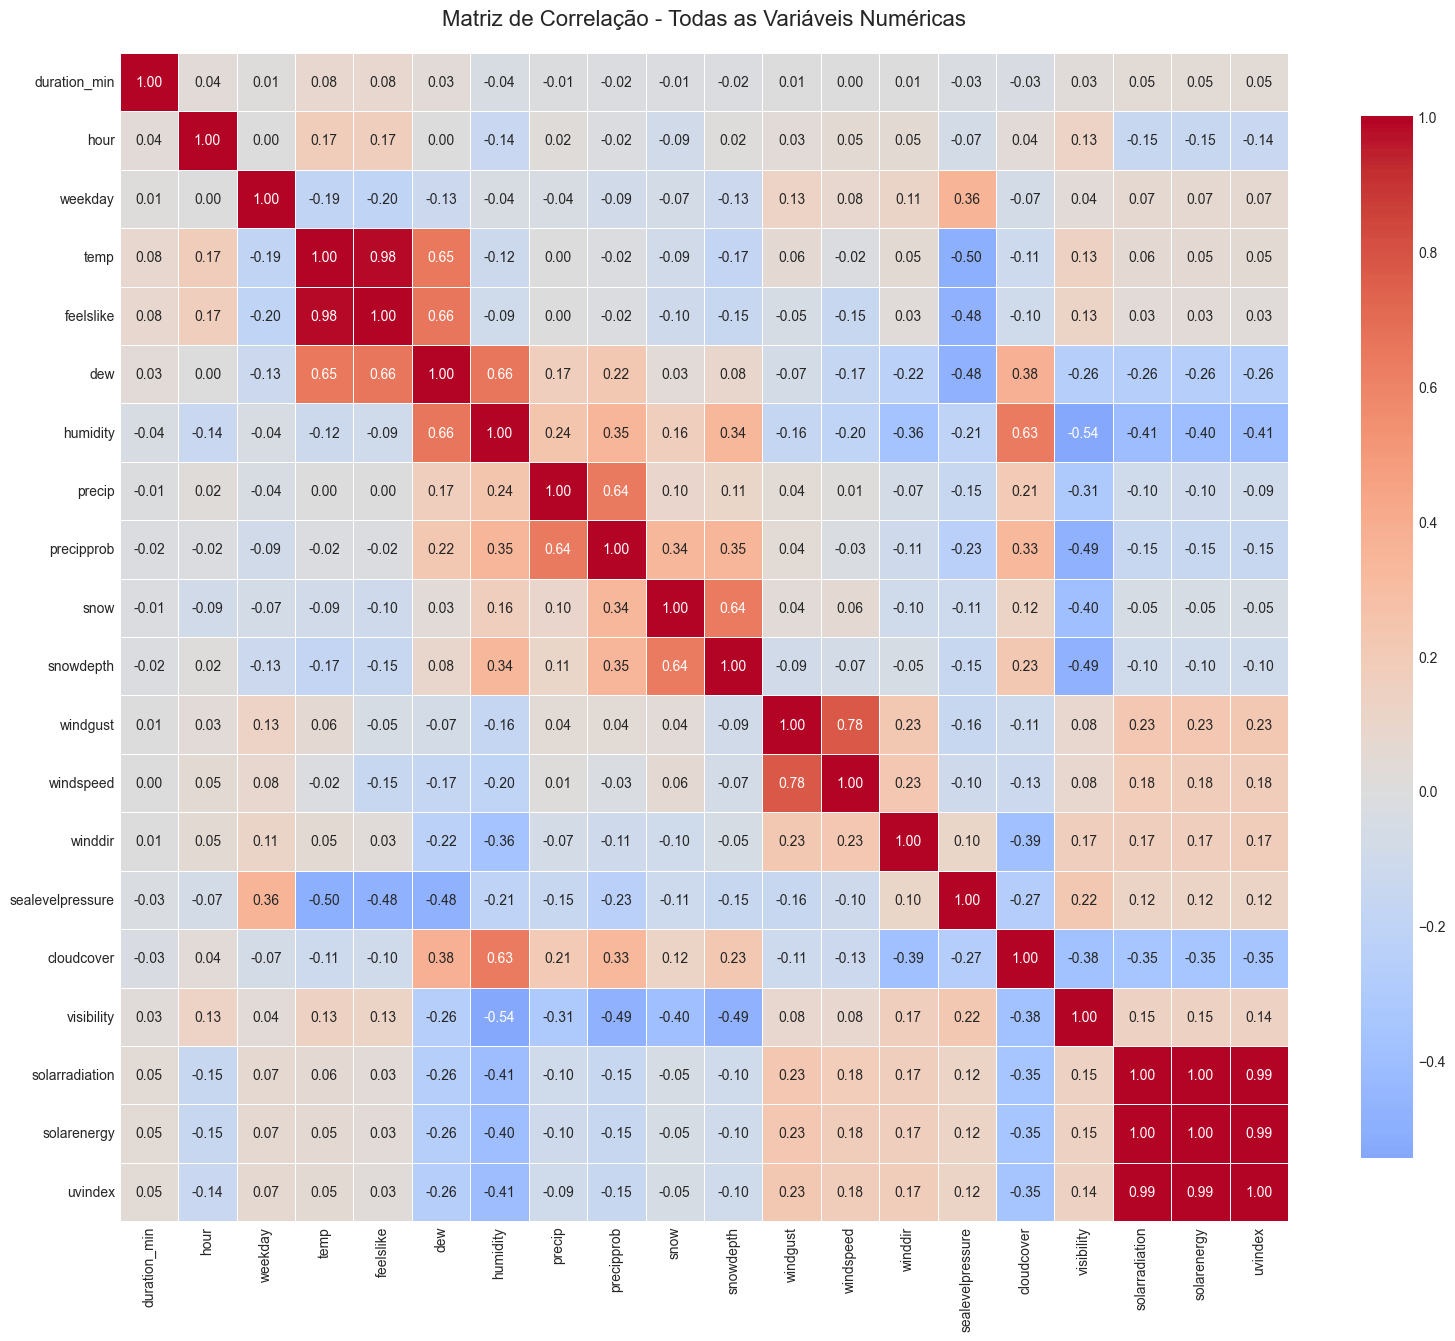

In [17]:
# Selecionar apenas variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

# Visualizar matriz de correlação completa
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Todas as Variáveis Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

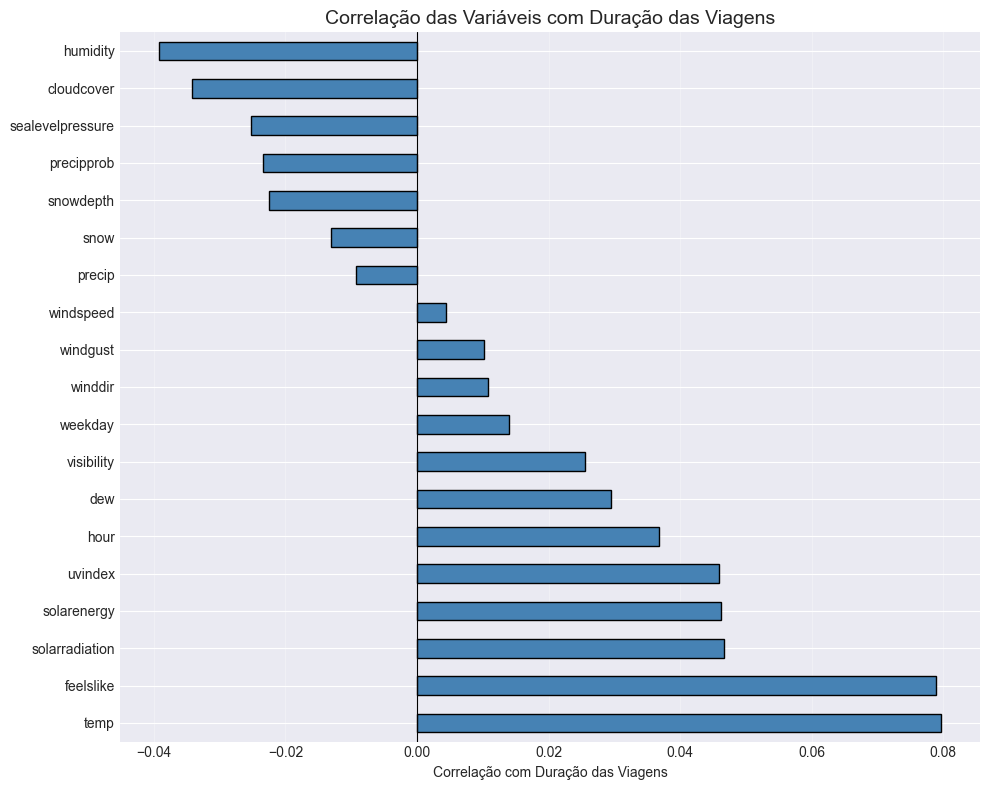


🎯 Top 10 Variáveis Mais Correlacionadas com Duração:
temp              0.079646
feelslike         0.078827
solarradiation    0.046630
solarenergy       0.046162
uvindex           0.045967
hour              0.036845
dew               0.029421
visibility        0.025543
weekday           0.014029
winddir           0.010813
Name: duration_min, dtype: float64


In [18]:
# Correlação com a variável alvo (duration_min)
target_correlation = correlation_matrix['duration_min'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
target_correlation.drop('duration_min').plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Correlação com Duração das Viagens')
plt.title('Correlação das Variáveis com Duração das Viagens', fontsize=14)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n🎯 Top 10 Variáveis Mais Correlacionadas com Duração:")
print(target_correlation.drop('duration_min').head(10))

## 7. Análise de Condições Climáticas Categóricas


☁️ Análise de Condições Climáticas:


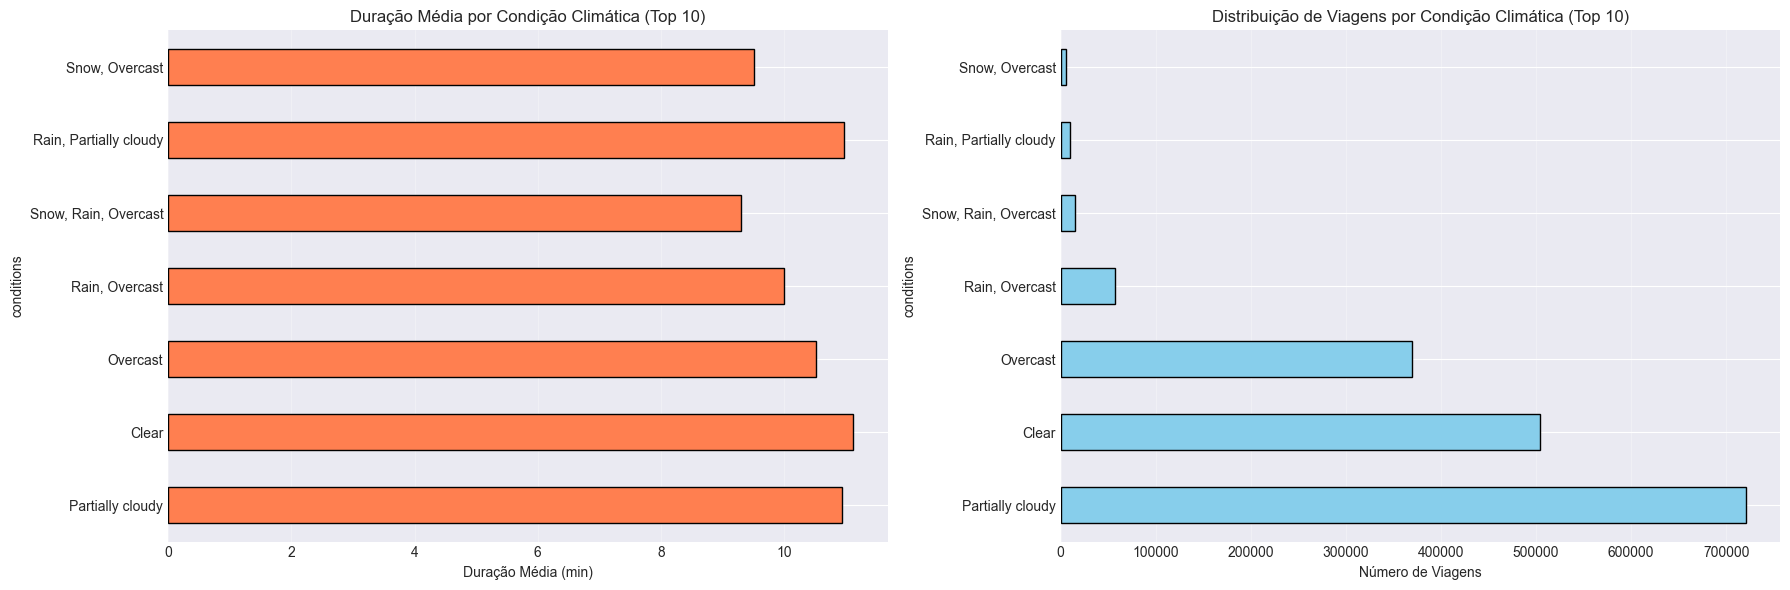

,mean,median,count
conditions,,,
Partially cloudy,10.945184,8.165967,720559
Clear,11.122002,8.262400,504235
Overcast,10.521459,7.946517,369135
"Rain, Overcast",9.994161,7.572300,57013
"Snow, Rain, Overcast",9.301599,7.114517,14621
"Rain, Partially cloudy",10.965289,8.505600,9488
"Snow, Overcast",9.515010,7.244650,5447


In [19]:
# Análise da coluna 'conditions' (se existir)
if 'conditions' in df.columns:
    print("\n☁️ Análise de Condições Climáticas:")
    conditions_stats = df.groupby('conditions')['duration_min'].agg(['mean', 'median', 'count']).sort_values('count', ascending=False)
    
    # Top 10 condições mais frequentes
    top_conditions = conditions_stats.head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Duração média por condição
    top_conditions['mean'].plot(kind='barh', ax=axes[0], color='coral', edgecolor='black')
    axes[0].set_xlabel('Duração Média (min)')
    axes[0].set_title('Duração Média por Condição Climática (Top 10)')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Contagem por condição
    top_conditions['count'].plot(kind='barh', ax=axes[1], color='skyblue', edgecolor='black')
    axes[1].set_xlabel('Número de Viagens')
    axes[1].set_title('Distribuição de Viagens por Condição Climática (Top 10)')
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    display(conditions_stats.head(10))


🌧️ Análise de Tipo de Precipitação:


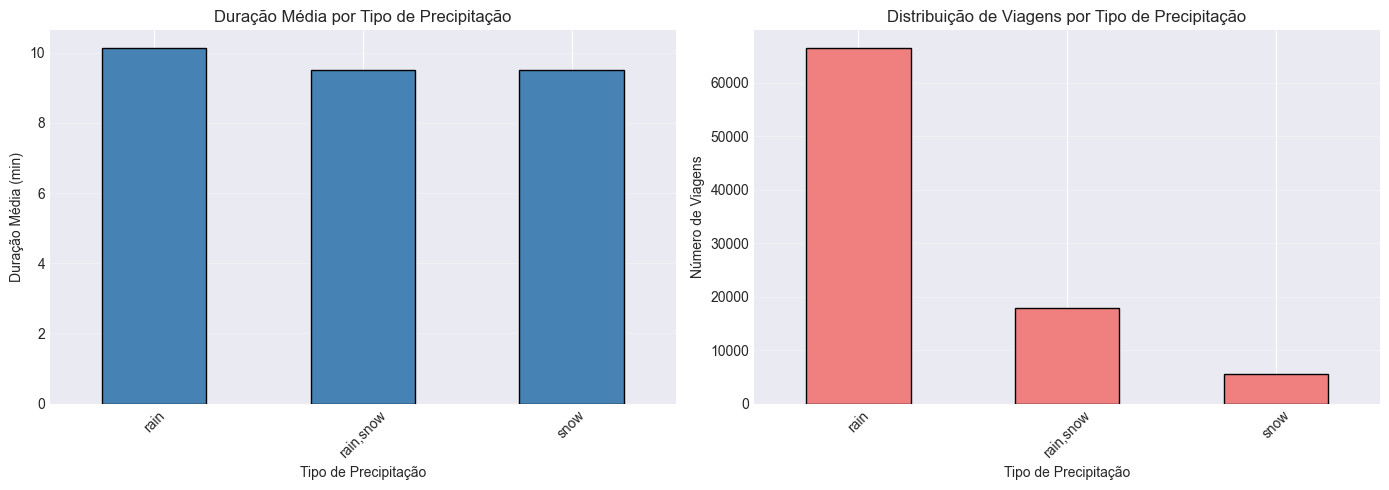

,mean,median,count
preciptype,,,
rain,10.132716,7.695300,66501
"rain,snow",9.497941,7.257867,17874
snow,9.515010,7.244650,5447


In [20]:
# Análise da coluna 'preciptype' (se existir)
if 'preciptype' in df.columns:
    print("\n🌧️ Análise de Tipo de Precipitação:")
    preciptype_stats = df.groupby('preciptype')['duration_min'].agg(['mean', 'median', 'count']).sort_values('count', ascending=False)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Duração média por tipo de precipitação
    preciptype_stats['mean'].plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
    axes[0].set_ylabel('Duração Média (min)')
    axes[0].set_xlabel('Tipo de Precipitação')
    axes[0].set_title('Duração Média por Tipo de Precipitação')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Contagem por tipo de precipitação
    preciptype_stats['count'].plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
    axes[1].set_ylabel('Número de Viagens')
    axes[1].set_xlabel('Tipo de Precipitação')
    axes[1].set_title('Distribuição de Viagens por Tipo de Precipitação')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    display(preciptype_stats)

## 8. Análise Avançada: Segmentação

<Figure size 1200x600 with 0 Axes>

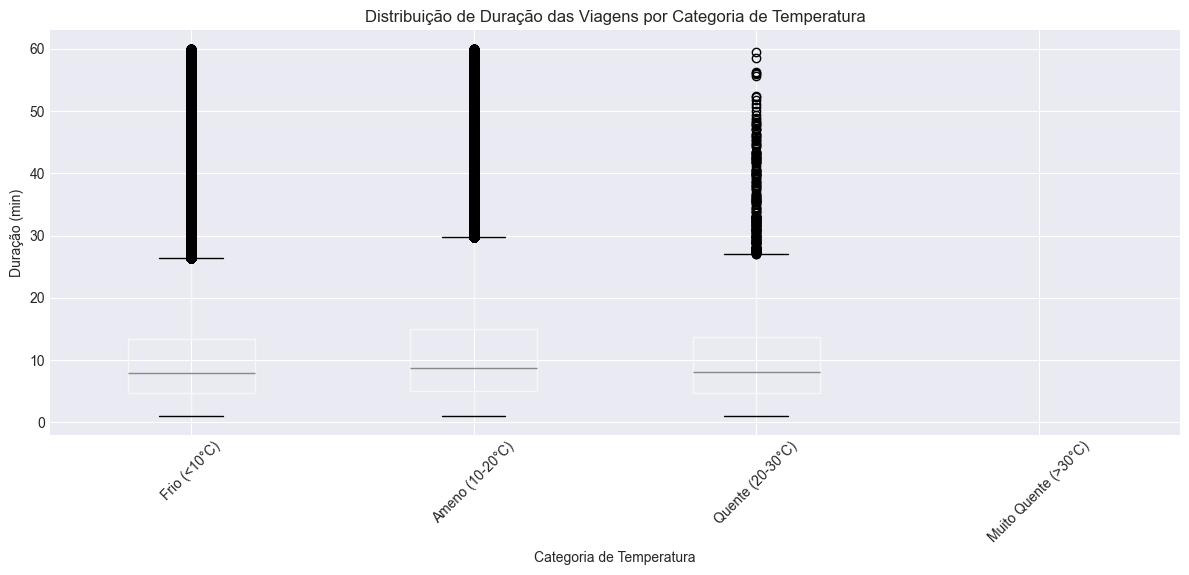

In [21]:
# Criar categorias de temperatura
df['temp_category'] = pd.cut(df['temp'], bins=[-np.inf, 10, 20, 30, np.inf], 
                               labels=['Frio (<10°C)', 'Ameno (10-20°C)', 'Quente (20-30°C)', 'Muito Quente (>30°C)'])

# Boxplot por categoria de temperatura
plt.figure(figsize=(12, 6))
df.boxplot(column='duration_min', by='temp_category', figsize=(12, 6))
plt.suptitle('')
plt.title('Distribuição de Duração das Viagens por Categoria de Temperatura')
plt.xlabel('Categoria de Temperatura')
plt.ylabel('Duração (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

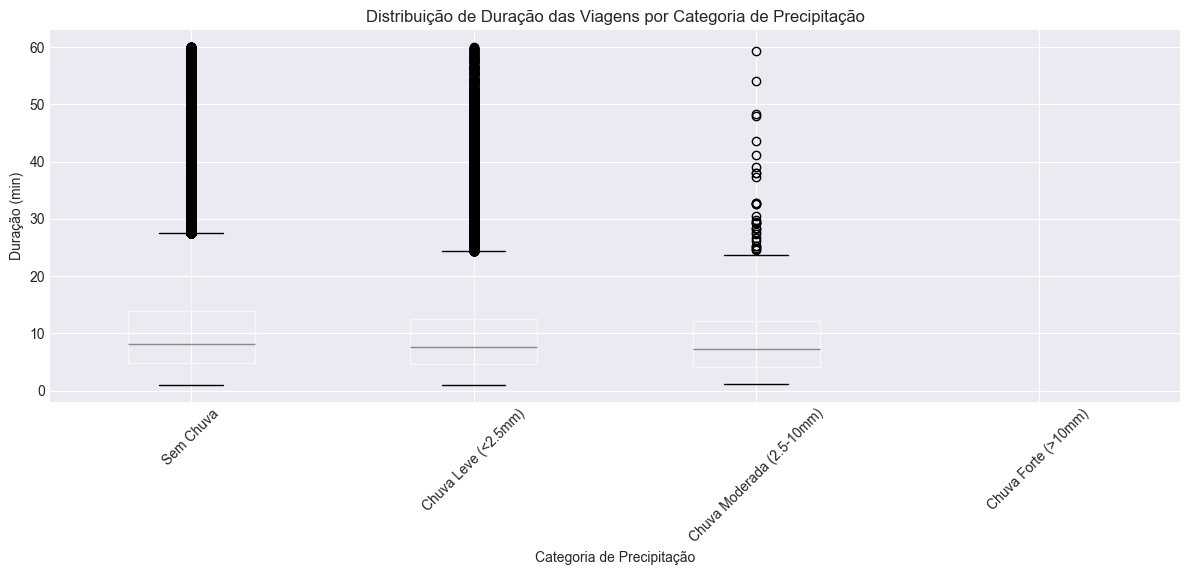

In [22]:
# Criar categorias de precipitação
df['precip_category'] = pd.cut(df['precip'], bins=[-0.1, 0, 2.5, 10, np.inf], 
                                labels=['Sem Chuva', 'Chuva Leve (<2.5mm)', 'Chuva Moderada (2.5-10mm)', 'Chuva Forte (>10mm)'])

# Boxplot por categoria de precipitação
plt.figure(figsize=(12, 6))
df.boxplot(column='duration_min', by='precip_category', figsize=(12, 6))
plt.suptitle('')
plt.title('Distribuição de Duração das Viagens por Categoria de Precipitação')
plt.xlabel('Categoria de Precipitação')
plt.ylabel('Duração (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

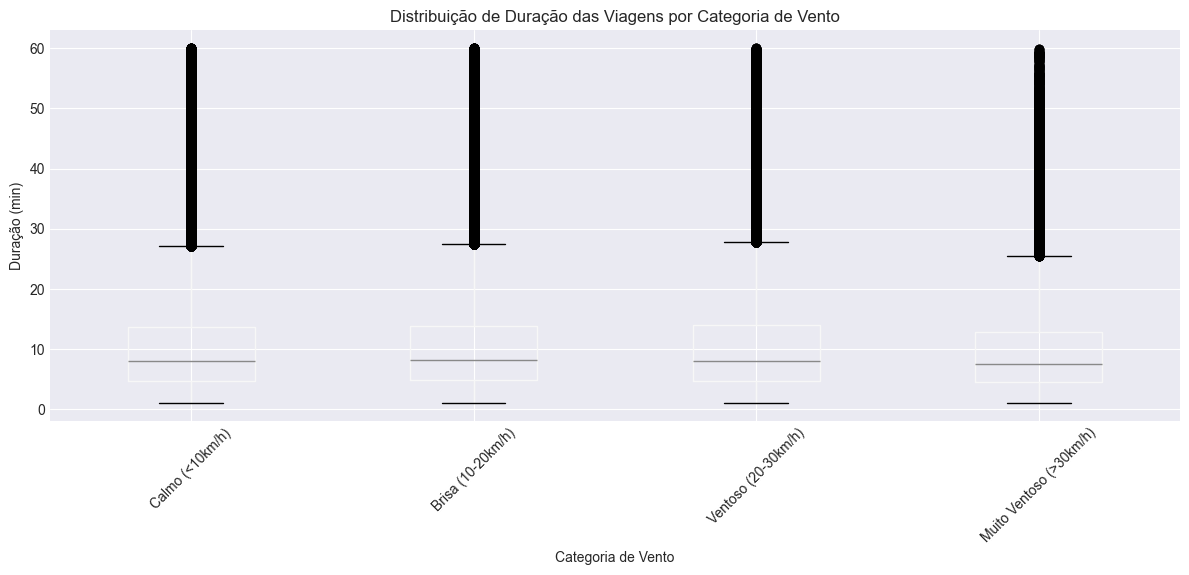

In [23]:
# Criar categorias de vento
df['wind_category'] = pd.cut(df['windspeed'], bins=[-np.inf, 10, 20, 30, np.inf], 
                              labels=['Calmo (<10km/h)', 'Brisa (10-20km/h)', 'Ventoso (20-30km/h)', 'Muito Ventoso (>30km/h)'])

# Boxplot por categoria de vento
plt.figure(figsize=(12, 6))
df.boxplot(column='duration_min', by='wind_category', figsize=(12, 6))
plt.suptitle('')
plt.title('Distribuição de Duração das Viagens por Categoria de Vento')
plt.xlabel('Categoria de Vento')
plt.ylabel('Duração (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Análise de Outliers


⚠️ Outliers detectados: 104,766 (6.23% do total)
Limite inferior: -8.77 min
Limite superior: 27.37 min


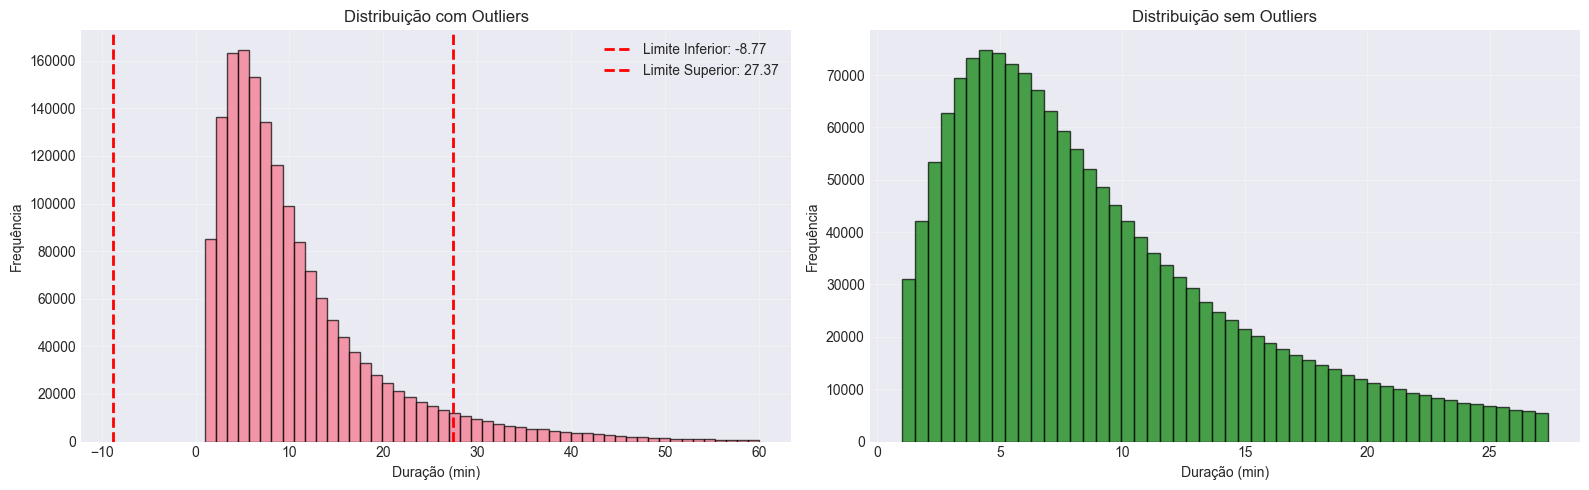

In [24]:
# Detectar outliers usando IQR
Q1 = df['duration_min'].quantile(0.25)
Q3 = df['duration_min'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['duration_min'] < lower_bound) | (df['duration_min'] > upper_bound)]

print(f"\n⚠️ Outliers detectados: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}% do total)")
print(f"Limite inferior: {lower_bound:.2f} min")
print(f"Limite superior: {upper_bound:.2f} min")

# Visualizar distribuição com e sem outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Com outliers
axes[0].hist(df['duration_min'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(lower_bound, color='red', linestyle='--', linewidth=2, label=f'Limite Inferior: {lower_bound:.2f}')
axes[0].axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=f'Limite Superior: {upper_bound:.2f}')
axes[0].set_xlabel('Duração (min)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição com Outliers')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Sem outliers
df_no_outliers = df[(df['duration_min'] >= lower_bound) & (df['duration_min'] <= upper_bound)]
axes[1].hist(df_no_outliers['duration_min'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Duração (min)')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição sem Outliers')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Resumo e Insights Principais

In [25]:
print("\n" + "="*80)
print("📊 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("="*80)

print(f"\n1️⃣ DADOS GERAIS:")
print(f"   • Total de viagens: {len(df):,}")
print(f"   • Período analisado: {df.shape[1]} variáveis")
print(f"   • Valores ausentes: {df.isnull().sum().sum():,}")

print(f"\n2️⃣ DURAÇÃO DAS VIAGENS:")
print(f"   • Média: {df['duration_min'].mean():.2f} minutos")
print(f"   • Mediana: {df['duration_min'].median():.2f} minutos")
print(f"   • Desvio padrão: {df['duration_min'].std():.2f} minutos")
print(f"   • Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")

print(f"\n3️⃣ PADRÕES TEMPORAIS:")
hourly_peak = hourly_stats['count'].idxmax()
weekday_peak = weekday_stats['count'].idxmax()
print(f"   • Hora com mais viagens: {hourly_peak}h ({hourly_stats.loc[hourly_peak, 'count']:.0f} viagens)")
print(f"   • Dia com mais viagens: {weekday_names[weekday_peak]} ({weekday_stats.loc[weekday_peak, 'count']:.0f} viagens)")

print(f"\n4️⃣ CONDIÇÕES CLIMÁTICAS:")
print(f"   • Temperatura média: {df['temp'].mean():.2f}°C")
print(f"   • Umidade média: {df['humidity'].mean():.2f}%")
print(f"   • Precipitação média: {df['precip'].mean():.2f} mm")
print(f"   • Velocidade do vento média: {df['windspeed'].mean():.2f} km/h")

print(f"\n5️⃣ CORRELAÇÕES PRINCIPAIS:")
top_5_corr = target_correlation.drop('duration_min').head(5)
for var, corr in top_5_corr.items():
    print(f"   • {var}: {corr:.3f}")

print("\n" + "="*80)
print("✅ Análise concluída!")
print("="*80)


📊 RESUMO DA ANÁLISE EXPLORATÓRIA

1️⃣ DADOS GERAIS:
   • Total de viagens: 1,680,598
   • Período analisado: 26 variáveis
   • Valores ausentes: 1,592,976

2️⃣ DURAÇÃO DAS VIAGENS:
   • Média: 10.85 minutos
   • Mediana: 8.11 minutos
   • Desvio padrão: 8.97 minutos
   • Outliers: 104,766 (6.23%)

3️⃣ PADRÕES TEMPORAIS:
   • Hora com mais viagens: 17h (156678 viagens)
   • Dia com mais viagens: Quarta (280309 viagens)

4️⃣ CONDIÇÕES CLIMÁTICAS:
   • Temperatura média: 6.85°C
   • Umidade média: 50.01%
   • Precipitação média: 0.03 mm
   • Velocidade do vento média: 13.15 km/h

5️⃣ CORRELAÇÕES PRINCIPAIS:
   • temp: 0.080
   • feelslike: 0.079
   • solarradiation: 0.047
   • solarenergy: 0.046
   • uvindex: 0.046

✅ Análise concluída!


## 11. Exportar Dataset Sem Outliers

In [26]:
# Remover colunas temporárias criadas durante a análise (se existirem)
cols_to_drop = ['temp_category', 'precip_category', 'wind_category']
df_clean = df_no_outliers.drop(columns=[col for col in cols_to_drop if col in df_no_outliers.columns])

# Salvar dataset sem outliers
output_path = "data/processed/travel_features_rich_without_outliers.csv"
df_clean.to_csv(output_path, index=False)

print("="*80)
print("📊 DATASET SEM OUTLIERS EXPORTADO COM SUCESSO!")
print("="*80)
print(f"\n📁 Arquivo salvo em: {output_path}")
print(f"\n📈 Comparação:")
print(f"   • Dataset original: {len(df):,} linhas")
print(f"   • Dataset sem outliers: {len(df_clean):,} linhas")
print(f"   • Linhas removidas: {len(df) - len(df_clean):,} ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")
print(f"   • Colunas: {df_clean.shape[1]}")
print(f"\n📊 Estatísticas do Dataset Filtrado:")
print(f"   • Duração média: {df_clean['duration_min'].mean():.2f} min")
print(f"   • Duração mediana: {df_clean['duration_min'].median():.2f} min")
print(f"   • Duração mínima: {df_clean['duration_min'].min():.2f} min")
print(f"   • Duração máxima: {df_clean['duration_min'].max():.2f} min")
print(f"   • Desvio padrão: {df_clean['duration_min'].std():.2f} min")
print("\n" + "="*80)
print("✅ Pronto para uso em modelos de Machine Learning!")
print("="*80)

📊 DATASET SEM OUTLIERS EXPORTADO COM SUCESSO!

📁 Arquivo salvo em: data/processed/travel_features_rich_without_outliers.csv

📈 Comparação:
   • Dataset original: 1,680,598 linhas
   • Dataset sem outliers: 1,575,832 linhas
   • Linhas removidas: 104,766 (6.23%)
   • Colunas: 23

📊 Estatísticas do Dataset Filtrado:
   • Duração média: 9.15 min
   • Duração mediana: 7.63 min
   • Duração mínima: 1.00 min
   • Duração máxima: 27.37 min
   • Desvio padrão: 5.92 min

✅ Pronto para uso em modelos de Machine Learning!
